In [1]:
# Install Albumentations
!pip install albumentations

# 1. Preparation

In [2]:
# Import modules
import random
import cv2
import albumentations as A
from matplotlib import pyplot as plt

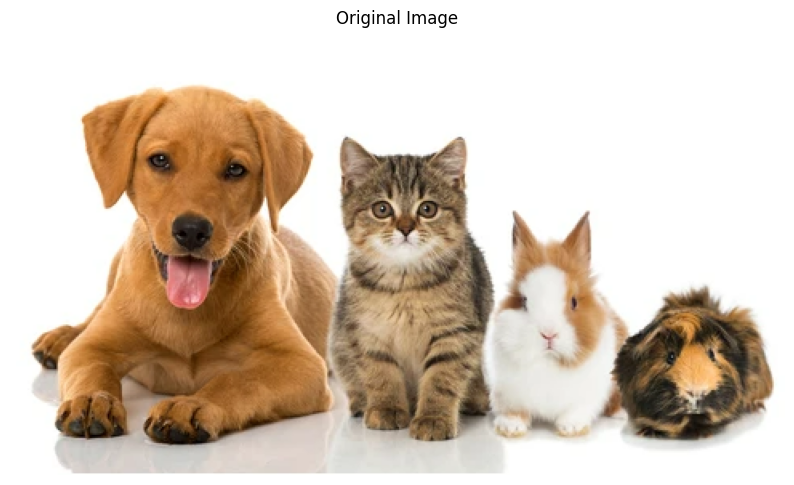

In [3]:
# Define a function for visualization
def visualization(image, name):
    plt.figure(figsize=(10, 10))
    plt.axis('off') # An option to display axises
    plt.title(name)
    plt.imshow(image)

# Load images
image = cv2.imread('./data/cat_dog_rabbit.PNG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Visualization
visualization(image, 'Original Image')

# 2. Horizontal Flip

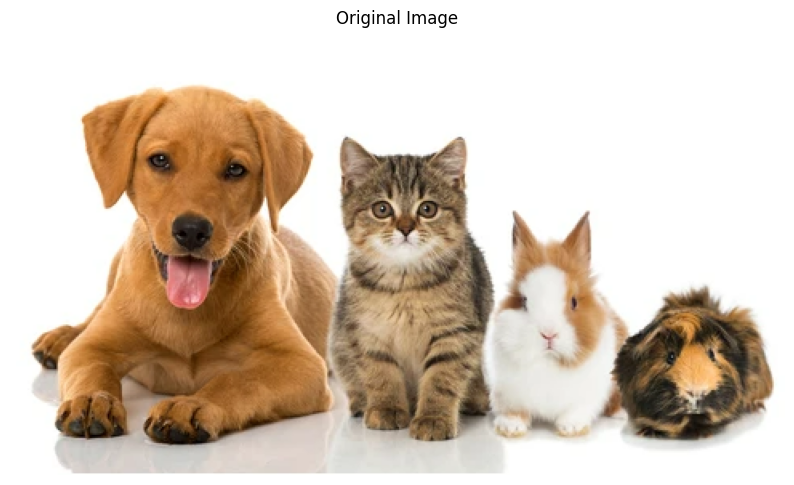

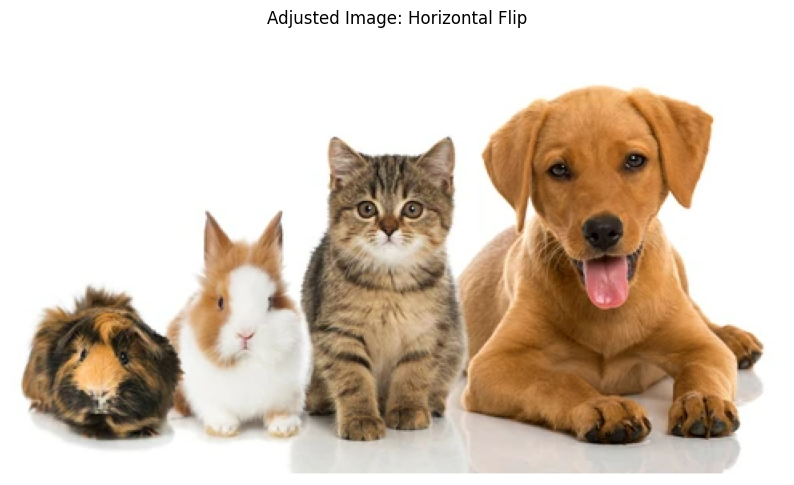

In [4]:
# Horizontal Flip
transform = A.HorizontalFlip(p=0.5)  # 'p=0.5': 50% chance to apply horizontal flip transformation
random.seed(85)
image_adjusted = transform(image = image)['image']

# Visualization
visualization(image, 'Original Image')
visualization(image_adjusted, 'Adjusted Image: Horizontal Flip')

# 3. Shift Scale Rotation

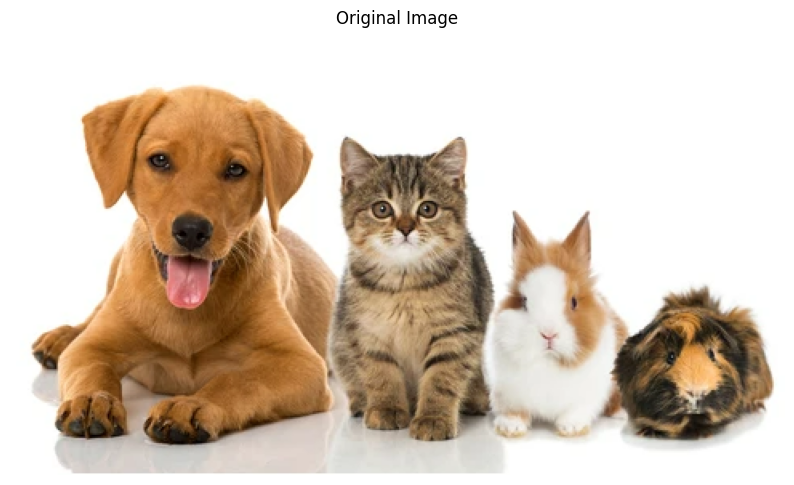

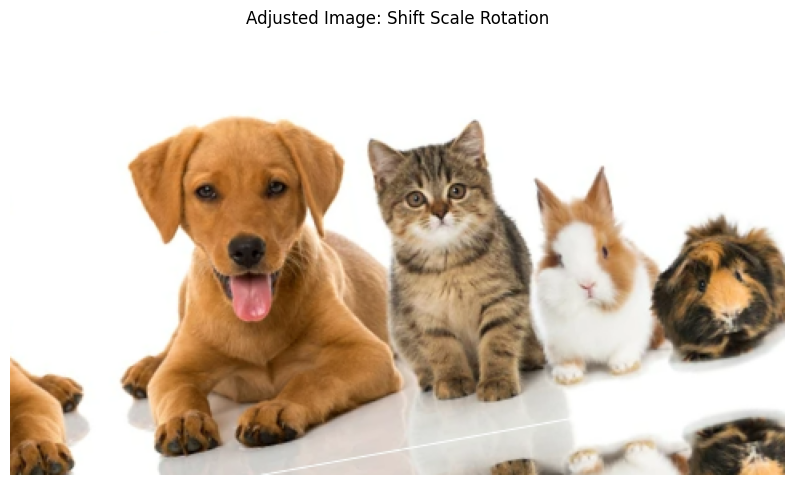

In [5]:
# Shift Scale Rotation
transform = A.ShiftScaleRotate(p = 0.5)
random.seed(85)
image_adjusted = transform(image = image)['image']

# Visualization
visualization(image, 'Original Image')
visualization(image_adjusted, 'Adjusted Image: Shift Scale Rotation')

# 4. A Multiple Transformation Pipeline

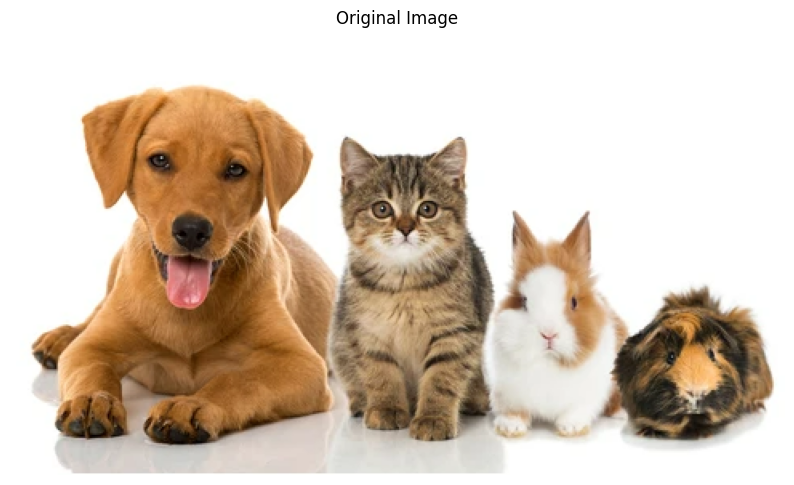

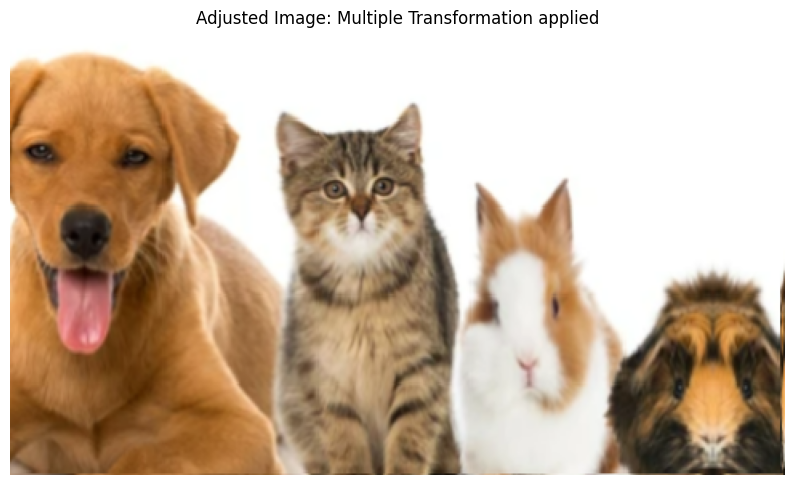

In [6]:
# Create a multiple transformation pipeline
transform = A.Compose([  # 'Compose()': Combine multiple transformations into a single transformation pipeline
    A.CLAHE(),  # CLAHE(Applies Contrast Limited Adaptive Histogram Equalization): Enhance image contrast
    A.RandomRotate90(),
    A.Transpose(), # Swap rows and columns
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=0.75),
    A.Blur(blur_limit=3),
    A.OpticalDistortion(),
    A.GridDistortion(),
    A.HueSaturationValue()
])
#random.seed(85)
image_adjusted = transform(image = image)['image']

# Visualization
visualization(image, 'Original Image')
visualization(image_adjusted, 'Adjusted Image: Multiple Transformation applied')

# 5. A Multiple Transformation Pipeline with random options

In [7]:
# Install modules
#!pip install imgaug
!pip install -U albumentations[imgaug]

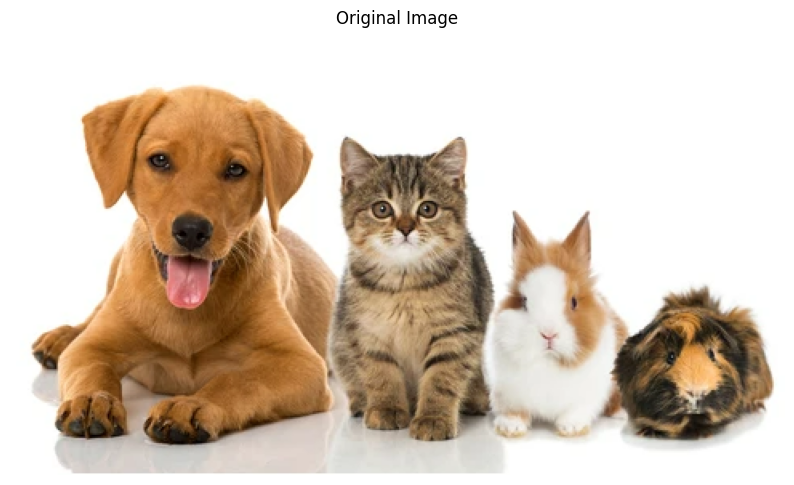

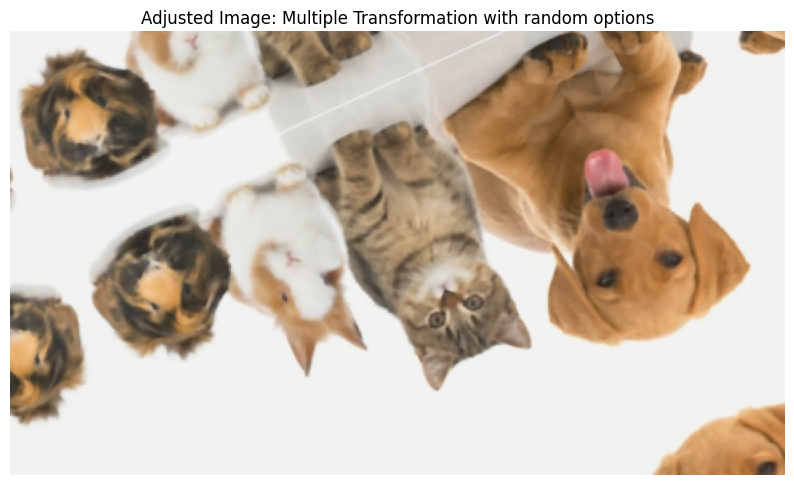

In [17]:
# Create a random multiple transformation pipeline
transform = A.Compose([
    A.RandomRotate90(),
    A.Flip(),
    A.Transpose(),  # Swap rows and columns
    A.OneOf([
        A.IAAAdditiveGaussianNoise(),  # Apply Additive Gaussian Noise to image using 'imgaug' library
        A.GaussNoise(), # Apply Gaussian Noise to image using 'albumentations' library
    ], p=0.2),  # a chance of 20% 
    A.OneOf([
        A.MotionBlur(p=0.2),
        A.MedianBlur(blur_limit=3, p=0.1),
        A.Blur(blur_limit=3, p=0.1)
    ], p=0.2),
    A.ShiftScaleRotate(shift_limit=0.0625,  # Max proportion to be shifted horizontally or vertically -> '0.0625': shifted up to 6.25% 
                      scale_limit=0.2,      # Max proportion to be scaled up or down -> '0.2': scaled up to 20%
                      rotate_limit=45,      # Max angle to be rotated clockwise or counterclockwise -> '45': rotated up to degree of 45
                      p=0.2),
    A.OneOf([
        A.OpticalDistortion(p=0.3),  # Create a fisheye or barrel distortion effect
        A.GridDistortion(p=0.1),     # Create stretching or compressing effects
        A.IAAPiecewiseAffine(p=0.3)  # Create localized distortions and deformations
    ], p=0.2),
    A.OneOf([
        A.CLAHE(clip_limit=2), # CLAHE(Applies Contrast Limited Adaptive Histogram Equalization): Enhance image contrast
        A.IAASharpen(),  # Enhance edges and details using IAAShapen
        A.IAAEmboss(),   # Create a relief-like texture by emphasizing high-frequency components
        A.RandomBrightnessContrast()
    ], p=0.3),
    A.HueSaturationValue(p=0.3)
])

image_adjusted = transform(image = image)['image']

# Visualization
visualization(image, 'Original Image')
visualization(image_adjusted, 'Adjusted Image: Multiple Transformation with random options')